In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./2022.csv').drop('Unnamed: 0', axis=1)
data['Date'] = pd.to_datetime(data['Date'])
group = data.groupby([data['Date'].dt.date])

In [3]:
sentiment = pd.concat([group.mean(), group.count()['Date']], axis=1).rename(columns={'Sentiment': 'avg_polar', 'Date': 'tweet_count'})
sentiment

,avg_polar,tweet_count
Date,,
2022-01-01,0.555556,27
2022-01-02,0.674419,43
2022-01-03,0.713235,136
2022-01-04,0.664804,179
2022-01-05,0.723577,123
...,...,...
2022-10-28,0.634686,271
2022-10-29,0.530055,183
2022-10-30,0.554307,267


In [4]:
def cast_float(x):
    first = float(x[0].replace('.', '').replace(',', '.'))
    second = float(x[1].replace('.', '').replace(',', '.'))
    third = float(x[2].replace('.', '').replace(',', '.').replace('%', ''))
    return pd.Series([first, second, third])

In [10]:
stock = pd.read_csv('../../StockAndTweetDataExtract/Stock_data/THYAO_2022.csv')
stock['Tarih'] = pd.to_datetime(stock['Tarih'], format="%d.%m.%Y")
stock.set_index('Tarih', inplace=True)
stock.drop(['Yüksek', 'Düşük', 'Hac.'], axis=1, inplace=True)
stock = stock.apply(lambda x: cast_float(x), axis=1).rename(columns={0: 'şimdi', 1: 'açılış', 2: 'fark'})
stock

,şimdi,açılış,fark
Tarih,,,
2022-11-01,102.40,102.30,1.09
2022-10-31,101.30,97.70,4.49
2022-10-28,96.95,98.70,-2.46
2022-10-27,99.40,99.10,0.61
2022-10-26,98.80,101.20,-1.69
...,...,...,...
2022-01-07,24.94,25.24,0.32
2022-01-06,24.86,23.62,4.02
2022-01-05,23.90,22.10,4.82


In [11]:
merged = stock.merge(sentiment, right_index=True, left_index=True)
merged

,şimdi,açılış,fark,avg_polar,tweet_count
2022-11-01,102.40,102.30,1.09,0.634361,454
2022-10-31,101.30,97.70,4.49,0.630435,460
2022-10-28,96.95,98.70,-2.46,0.634686,271
2022-10-27,99.40,99.10,0.61,0.638142,409
2022-10-26,98.80,101.20,-1.69,0.672098,491
...,...,...,...,...,...
2022-01-07,24.94,25.24,0.32,0.619289,197
2022-01-06,24.86,23.62,4.02,0.629310,232
2022-01-05,23.90,22.10,4.82,0.723577,123
2022-01-04,22.80,21.90,4.40,0.664804,179


<AxesSubplot:>

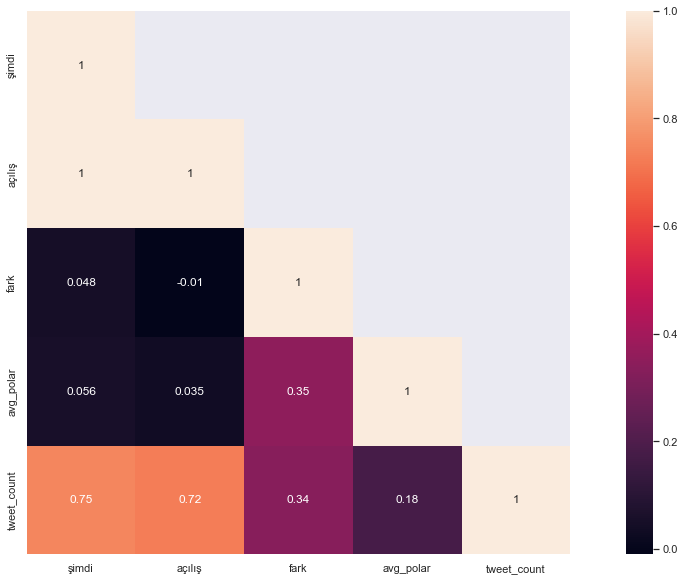

In [12]:
cor_mat= merged.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
sns.set(font_scale=1)
fig.set_size_inches(20,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [13]:
merged.to_csv('2022_final.csv')